In [1]:
import numpy as np
from lib.pde_find import PDEFind
from utils.plot_1D import plot_2d, plot_3d
from IPython.display import display, Math

In [2]:
data = np.load("data/2.npz")

u = data["u"]
x = data["x"]
t = data["t"]

data = np.stack([x, t, u], axis=-1)
vars = (["x", "t"], ["u"])

In [3]:
pdefind = PDEFind(data, vars, lib_size=3, order=3)

In [4]:
library, labels = pdefind.create_library()

display(Math(r"\\".join(labels)))

<IPython.core.display.Math object>

In [5]:
u_t = np.gradient(u, t[0], axis=1)

In [6]:
coef, alpha = pdefind.solve_regression(library, u_t, algorithm="lasso")

Solving using lasso regression
Library size: 3601920, Target size: 102912
# of non-zero terms: 4


In [7]:
display(Math(pdefind.latex_string()))

<IPython.core.display.Math object>

In [8]:
include_terms = pdefind.non_zero_terms(coef)
include_terms

('u_{xxx}', 'u_{xx}u_{x}', 'u_{x}', 'uu_{x}')

In [9]:
sol, time_steps = pdefind.solve_pde(u[:, 0], include_terms=include_terms, coefs=[coef])

Solver time steps: 201


In [10]:
# error = pdefind.verify_pde_rel_l2()

# print(f"rel. L2 Error {error}")

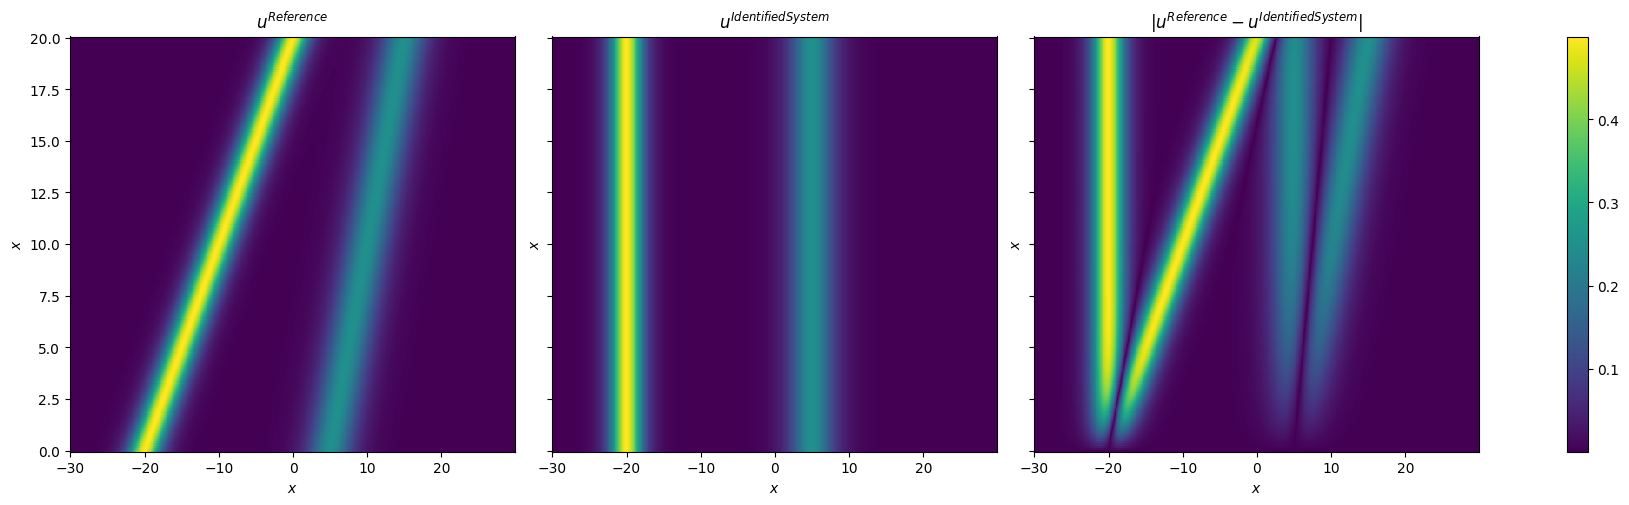

In [11]:
plot_2d(sol, data)

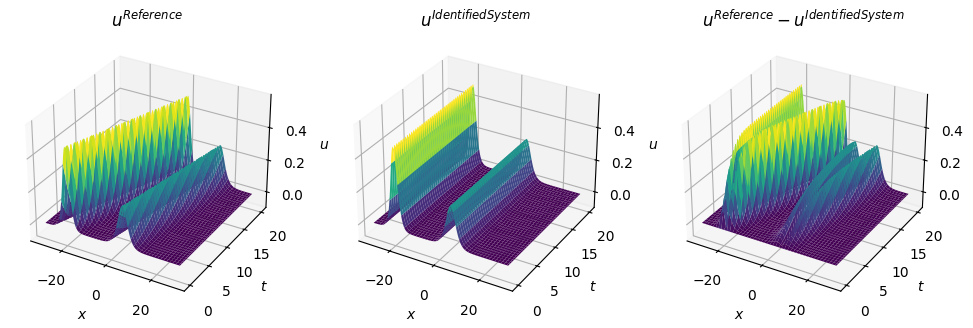

In [12]:
plot_3d(sol, data)